In [12]:
import numpy as np
import pandas as pd  

In [13]:
df = pd.read_csv('spam.csv',encoding= 'latin-1')

In [14]:
df.shape

(5572, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [17]:
df.sample(6)

,v1,v2
3609,ham,"Call me. I m unable to cal. Lets meet bhaskar,..."
3048,ham,Lol they don't know about my awesome phone. I ...
609,ham,"It's fine, imma get a drink or somethin. Want ..."
2483,ham,Mm have some kanji dont eat anything heavy ok
2919,ham,"Thanx 4 the time weåÕve spent 2geva, its bin m..."
220,ham,Ok no prob. Take ur time.


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df.rename (columns={'v1': 'Spam/Ham', 'v2': 'text'}, inplace=True)
df.sample(5)

,Spam/Ham,text
1876,ham,Watching tv now. I got new job :)
1500,ham,Host-based IDPS for linux systems.
734,ham,Leaving to qatar tonite in search of an opport...
5165,ham,ÌÏ still got lessons? ÌÏ in sch?
1316,ham,Why nothing. Ok anyway give me treat


In [20]:
df['Spam/Ham'] = encoder.fit_transform(df['Spam/Ham']) 

In [21]:
df.head()

,Spam/Ham,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.isnull().sum()

Spam/Ham    0
text        0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(403)

In [24]:
df = df.drop_duplicates(keep = 'first')

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df['Spam/Ham'].value_counts()

Spam/Ham
0    4516
1     653
Name: count, dtype: int64

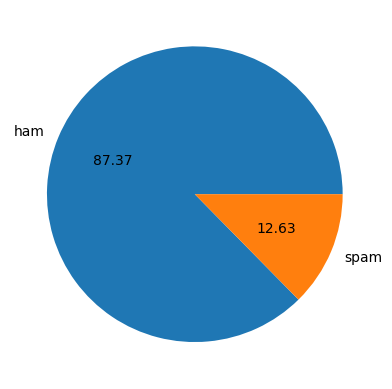

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['Spam/Ham'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df.head()

,Spam/Ham,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df['character_count'] = df['text'].apply(len)

In [32]:
df['sentence_count'] = df ['text'].apply(lambda x:len (nltk.sent_tokenize(x)))

In [33]:
df['word_count'] = df ['text'].apply(lambda x:len (nltk.word_tokenize(x)))

In [34]:
df.head()

,Spam/Ham,text,character_count,sentence_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [35]:
df [df['Spam/Ham'] == 1][[ 'character_count', 'word_count', 'sentence_count']].describe()

,character_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
df [df['Spam/Ham'] == 0][[ 'character_count', 'word_count', 'sentence_count']].describe()

,character_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
import seaborn as sns

<Axes: xlabel='character_count', ylabel='Count'>

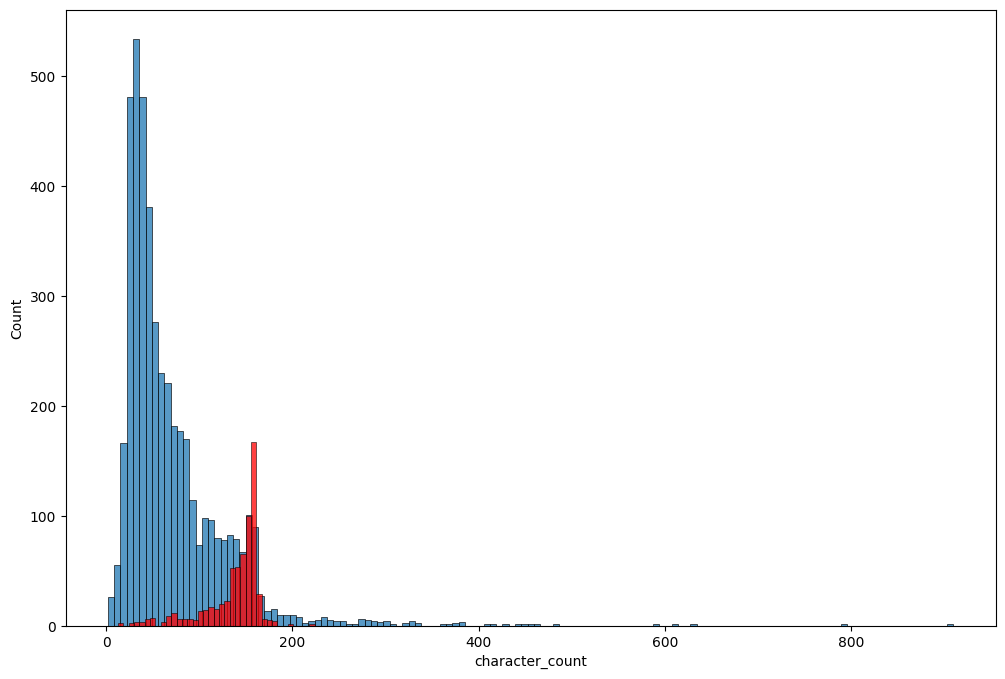

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(df [df['Spam/Ham'] == 0]['character_count'])
sns.histplot(df [df['Spam/Ham'] == 1]['character_count'], color='red')

<Axes: xlabel='word_count', ylabel='Count'>

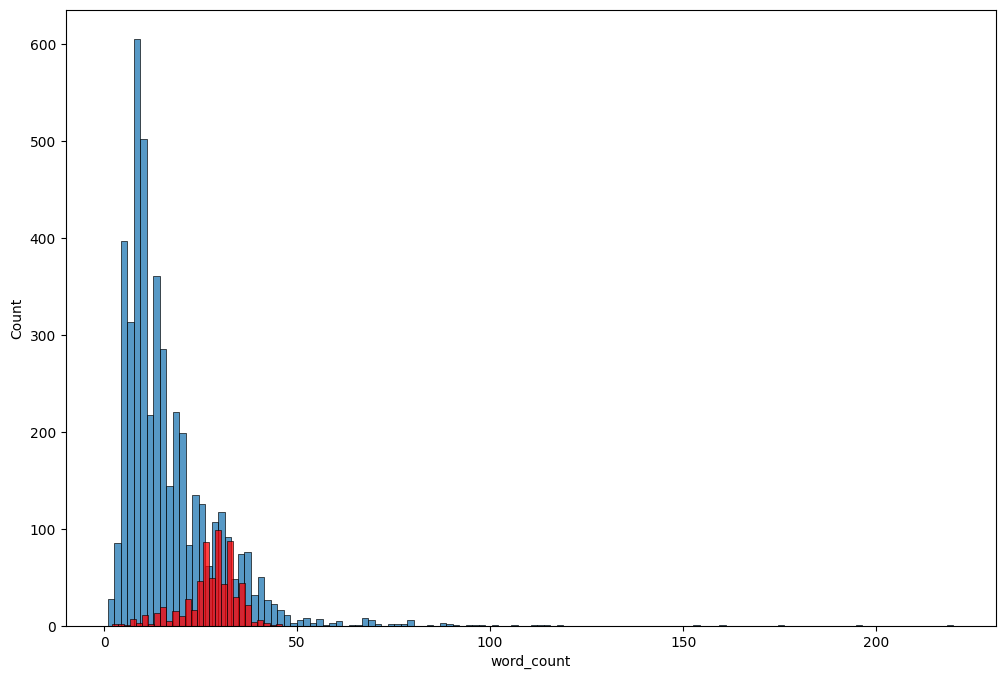

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(df [df['Spam/Ham'] == 0]['word_count'])
sns.histplot(df [df['Spam/Ham'] == 1]['word_count'], color='red')

<Axes: xlabel='sentence_count', ylabel='Count'>

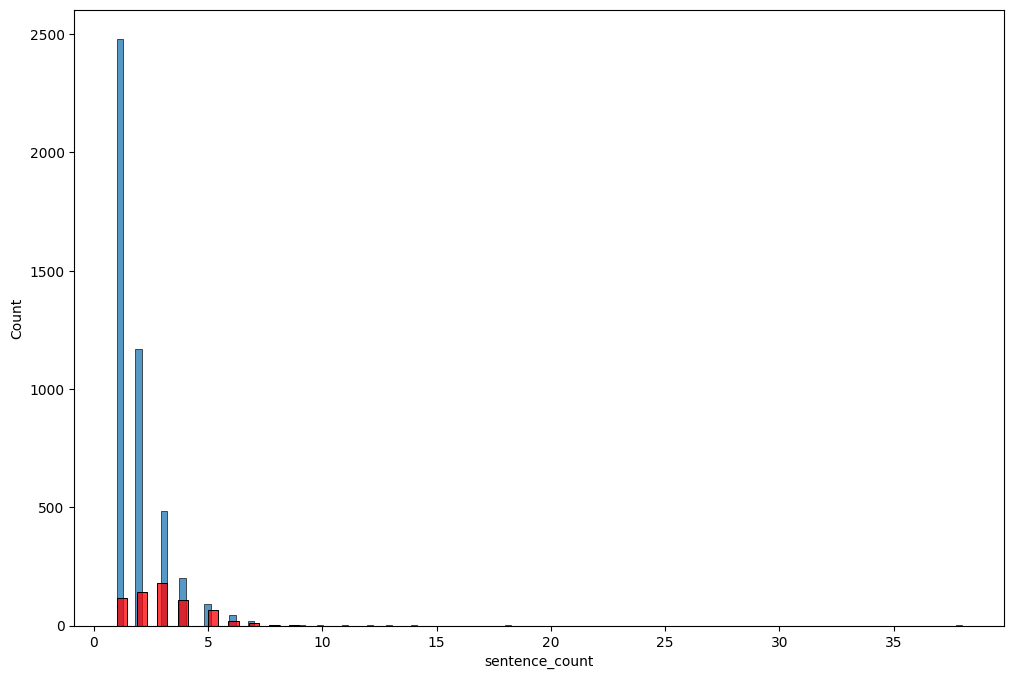

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(df [df['Spam/Ham'] == 0]['sentence_count'])
sns.histplot(df [df['Spam/Ham'] == 1]['sentence_count'], color='red')

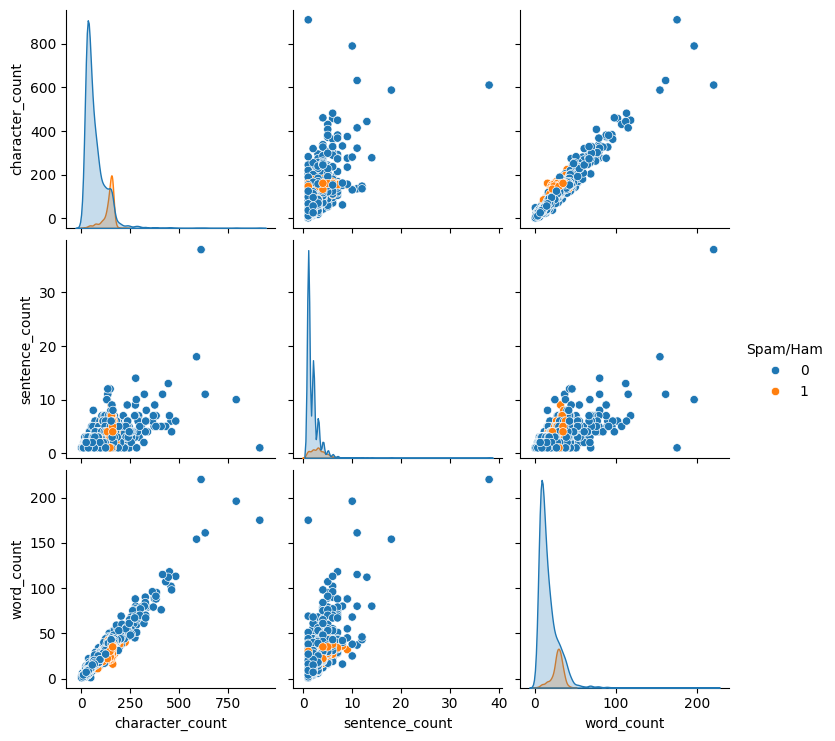

In [42]:
sns.pairplot(df, hue='Spam/Ham')

<Axes: >

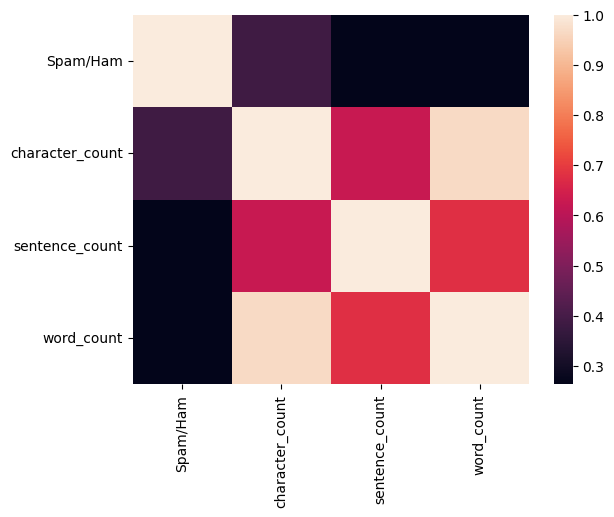

In [43]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr)

<Axes: >

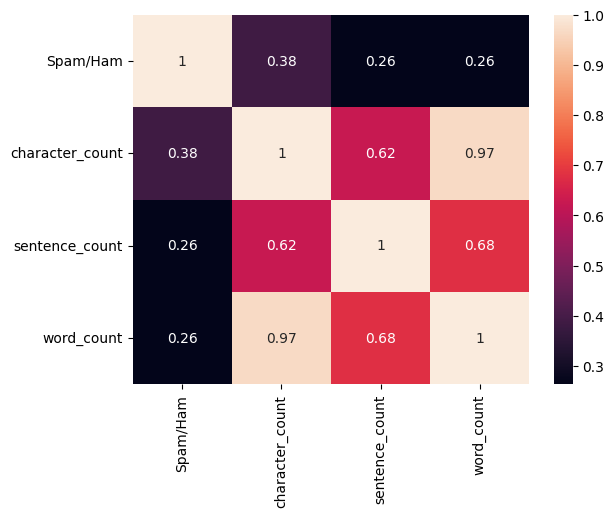

In [44]:

 sns.heatmap(numeric_df.corr(),annot=True)
  

## Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [55]:
def transform_text(text):
    text = text.lower()

    text = nltk.word_tokenize(text)

    y = []
    for i in text:
     if i.isalnum():
       y.append(i)
          
    text = y[:]
    y.clear()
     
    for i in text:
     if i not in stopwords.words('english') and i not in string.punctuation:
       y.append(i)

    text = y[:]
    y.clear()
    for i in text:
     y.append(ps.stem (i))
    return " ".join(y)

In [56]:
transform_text('I loved the YT lectures on Machine Learning%. How about you?')

'love yt lectur machin learn'

In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('riding')

'ride'

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [52]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
df['transformed_text'] = df['text'].apply(transform_text)

In [58]:
df.head()

,Spam/Ham,text,character_count,sentence_count,word_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [ ]:
!pip install wordcloud

In [59]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10, background_color='white')

In [60]:
spam_wc = wc.generate (df [df['Spam/Ham'] == 1]['transformed_text' ].str.cat (sep=" "))

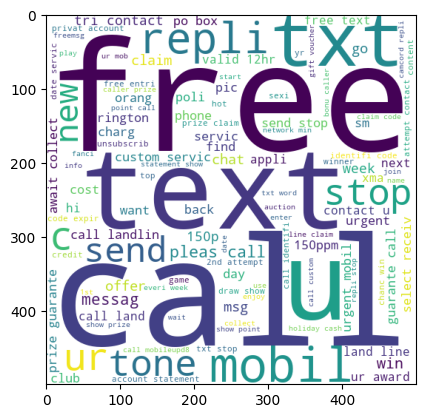

In [61]:
plt.imshow(spam_wc)

In [62]:
Ham_wc = wc.generate (df [df['Spam/Ham'] == 0]['transformed_text' ].str.cat (sep=" "))

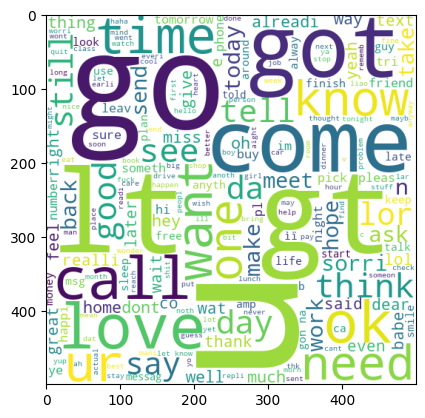

In [63]:
plt.imshow(Ham_wc)

In [64]:
spam_corpus = []
for msg in df[df['Spam/Ham'] == 1]['transformed_text'].tolist():
   for word in msg.split():
    spam_corpus.append(word)

In [65]:
len(spam_corpus)

9939

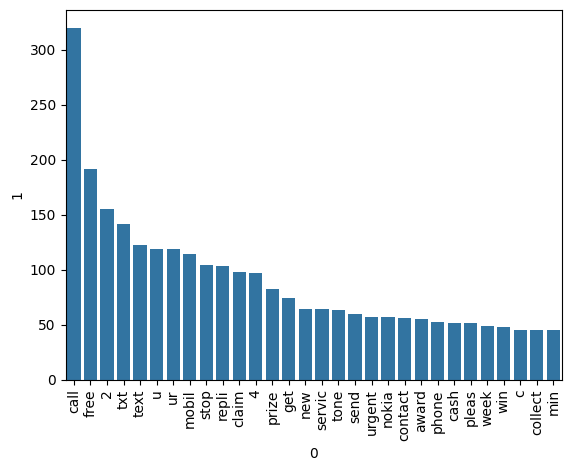

In [66]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
ham_corpus = []
for msg in df[df['Spam/Ham'] == 0]['transformed_text'].tolist():
   for word in msg.split():
    ham_corpus.append(word)

In [68]:
len(ham_corpus)

35404

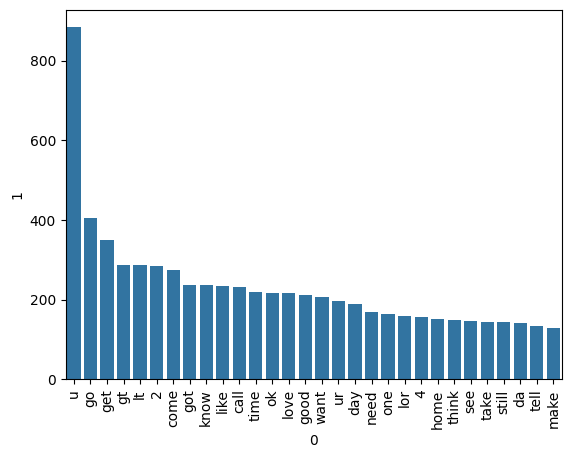

In [69]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
X.shape

(5169, 3000)

In [74]:
y = df['Spam/Ham'].values

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 1.6/56.8 MB 7.9 MB/s eta 0:00:07
   -- ------------------------------------- 3.4/56.8 MB 8.1 MB/s eta 0:00:07
   ---- ----------------------------------- 5.8/56.8 MB 9.0 MB/s eta 0:00:06
   ----- ---------------------------------- 7.6/56.8 MB 9.0 MB/s eta 0:00:06
   ------ --------------------------------- 9.2/56.8 MB 8.8 MB/s eta 0:00:06
   ------- -------------------------------- 11.3/56.8 MB 8.8 MB/s eta 0:00:06
   --------- ------------------------------ 13.1/56.8 MB 8.8 MB/s eta 0:00:05
   --------- ------------------------------ 13.6/56.8 MB 8.8 MB/s eta 0:00:05
   ----------- ---------------------------- 15.7/56.8 MB 8.2 MB/s eta 0:00:06
   ------------ --------------------------- 17.6/56.8 MB 8.2 MB/s eta 0:00:05
   ------------- -------------------------- 19.1/56.8 MB 8.2 MB/s eta 0:00:05
   -------------- ------------------------- 20.4/56.8 MB 8.1 MB/s eta 0:00:05

In [80]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [120]:
clfrs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [121]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [122]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [123]:
accuracy_scores = []
precision_scores = []

for name,clf in clfrs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.97678916827853
Precision -  0.975
For  AdaBoost
Accuracy -  0.9235976789168279
Precision -  0.8390804597701149
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.95


In [124]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [125]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.976789,0.975000
0,SVC,0.975822,0.974790
4,LR,0.956480,0.969697
8,ETC,0.977756,0.967480
10,xgb,0.970986,0.950000
9,GBDT,0.950677,0.930693
7,BgC,0.959381,0.869231
6,AdaBoost,0.923598,0.839080


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [99]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [100]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [102]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [103]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## Model Improvement

In [105]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [126]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [127]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [128]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [129]:
# Stacking

In [130]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [131]:
from sklearn.ensemble import StackingClassifier

In [132]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [133]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [134]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))